# MCMC para Ising 

En el notebook anterior, vimos cómo muestrear de una distribución de probabilidad $\pi$ dada, usando el algoritmo de Metropolis, que es un ejemplo de un método de "Markov Chain Monte Carlo" ("Monte Carlo usando cadenas de Markov",  MCMC).
Apliquemos esto al modelo de Ising.

$\newcommand{\ss}{\pmb \sigma}
\newcommand{\tt}{\pmb \tau}$

[1] Escribe la probabilidad de aceptación, $\alpha(\ss \to \tt)$, para la distribución de Boltzmann, en términos de la diferencia de energías, $\Delta E := E(\tt) - E(\ss)$.

$\alpha(\ss \to \tt) = min\{1,e^{-\beta \Delta E}\}$

[2] En el caso de voltear un solo espín, encuentra una expresión analítica para $\Delta E$, en términos del valor actual del espín que se va a voltear (antes de que se cambie su valor) y los valores de sus espines. 

$\Delta E = 2 \sigma_{x0} \sum_{vecinos} \sigma_{ij} $ donde $\sigma_{x0}$ es el valor del espín a cambiar. El 2 viene
de la diferencia de las energías

[3] Así, implementa el algoritmo de Metropolis para simular el modelo de Ising a una temperatura $T$ dada. 

Nota que el resultado de la pregunta [2] muestra que, una vez propuesto un espín por voltear, *no* es necesario voltear el espín para calcular la $\Delta E$, y, por lo tanto, se requiere voltearlo *sólo* si el cambio propuesto resulte ser aceptado. Se puede voltear al modificar la misma configuración.

In [11]:
function configuracion(L)
    sigma=zeros(L,L)
    for i=1:L
        for j=1:L
            sigma[i,j]=int(rand(-1:2:1))
        end
    end
    return sigma
end

configuracion (generic function with 1 method)

In [37]:
function energia(sigma)
    L=size(sigma,1)
    E=0
    for i=1:L
        for j=1:L
            E+=-sigma[i,j]*(sigma[mod1(i+1,L),j]+sigma[i,mod1(j+1,L)])
        end
    end
    return E
end

energia (generic function with 1 method)

In [38]:
function dE(sigma,i,j)
    L=size(sigma,1)
    E1=2*sigma[i,j]*(sigma[mod1(i+1,L),j]+sigma[mod1(i-1,L),j]+sigma[i,mod1(j+1,L)]+sigma[i,mod1(j-1,L)])
    return E1
end

dE (generic function with 1 method)

In [39]:
function Ising(L,T,t1,t2)
    sigma = int(configuracion(L))
    E=zeros(t2)
    M=zeros(t2)
    E[1]=energia(sigma)
    M[1]=sum(sigma)
    for i=2:t2
        E[i]=E[i-1]
        M[i]=M[i-1]
        a1=rand(1:L)
        a2=rand(1:L)
        E1=dE(sigma,a1,a2)
        b=min(e^(-E1/T),1)
        c=rand()
        if c<b
            sigma[a1,a2]=-sigma[a1,a2]
            E[i]=E[i]+E1
            M[i]=M[i]+2*sigma[a1,a2]
        end
    end
    Ep=sum(E[t1+1:t2])/(t2-t1)
    Mp=sum(M[t1+1:t2])/(t2-t1)
    return Ep,E,M,Mp,sigma
end          

Ising (generic function with 1 method)

In [40]:
A=Ising(20,5,10000,50000)

(-173.5509,[0.0,-4.0,-8.0,-8.0,-12.0,-12.0,-12.0,-16.0,-16.0,-16.0  …  -196.0,-196.0,-196.0,-196.0,-192.0,-192.0,-192.0,-196.0,-196.0,-200.0],[6.0,8.0,10.0,12.0,10.0,12.0,12.0,14.0,16.0,18.0  …  -62.0,-60.0,-60.0,-58.0,-56.0,-58.0,-56.0,-54.0,-52.0,-50.0],-6.3773,
20x20 Array{Int64,2}:
 -1  -1   1   1   1   1  -1  -1   1  …   1  -1  -1  -1  -1   1  -1   1  -1
  1   1  -1   1   1  -1  -1  -1  -1     -1  -1  -1  -1  -1   1  -1  -1   1
  1  -1   1  -1   1  -1  -1  -1  -1     -1  -1  -1  -1  -1   1  -1  -1  -1
  1   1  -1   1   1   1  -1  -1  -1      1  -1  -1   1   1   1  -1  -1   1
 -1  -1  -1   1   1   1  -1  -1  -1     -1   1  -1   1  -1   1   1   1  -1
 -1  -1  -1  -1   1   1  -1   1   1  …   1   1   1   1   1   1   1  -1  -1
  1  -1  -1  -1   1   1  -1   1   1      1   1  -1  -1   1   1   1  -1   1
  1   1  -1  -1  -1   1   1   1  -1      1   1  -1   1   1   1  -1   1   1
  1   1  -1  -1  -1  -1  -1  -1  -1     -1  -1  -1  -1  -1  -1   1   1   1
 -1   1   1   1   1   1   1  -1  -1   

In [41]:
using PyPlot

[4] Durante la simulación, rastrea los valores de la magnetización $M(t)$ y la energía $E(t)$. Dibuja estas cantidades como función del tiempo.

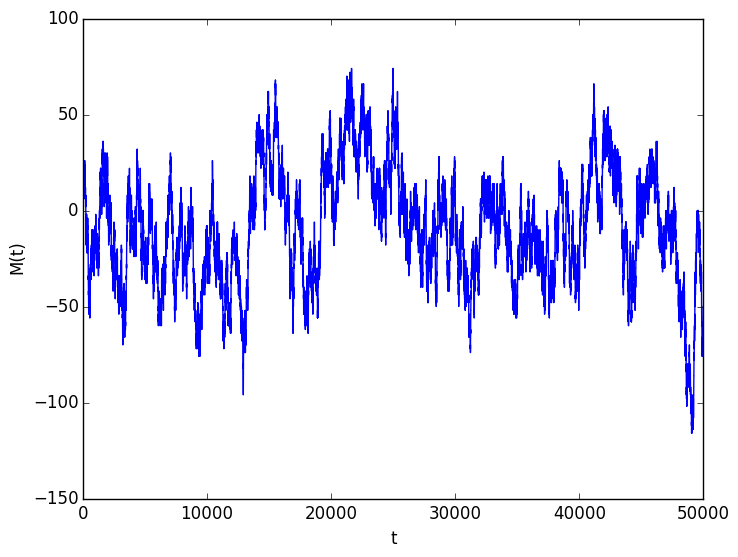

PyObject <matplotlib.text.Text object at 0x30f3c6b50>

In [42]:
plot(1:50000,A[3])
xlabel("t")
ylabel("M(t)")

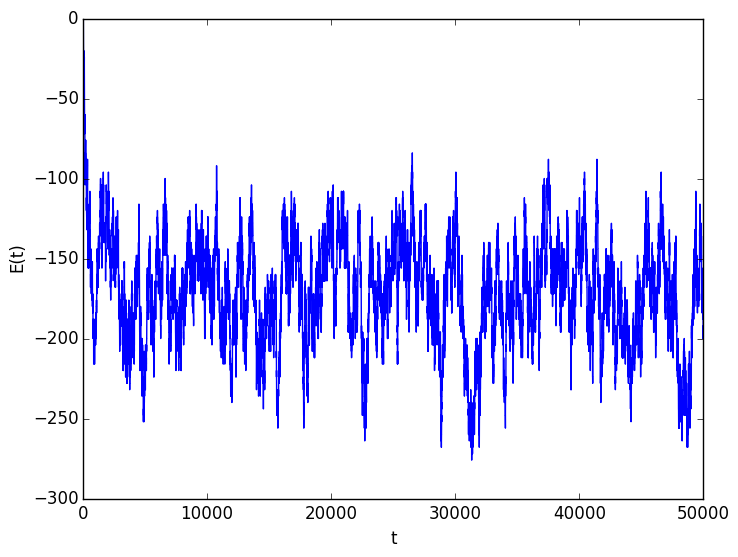

PyObject <matplotlib.text.Text object at 0x30f5a0990>

In [43]:
plot(1:50000,A[2])
xlabel("t")
ylabel("E(t)")

[5] Quisiéramos calcular estimados de valores promedio como $\langle E \rangle_\beta$. Viendo tus gráficas, propón cómo hacer esto e impleméntalo. 

Se podría tomar el promedio de las energías pasado cierto tiempo. Ya está implementado en el programa (de ahí el t1)

[6] Así, calcula $\langle E \rangle_\beta$ para distintos valores de $\beta$ entre $0$ y $5$, poniendo $J = 1$.

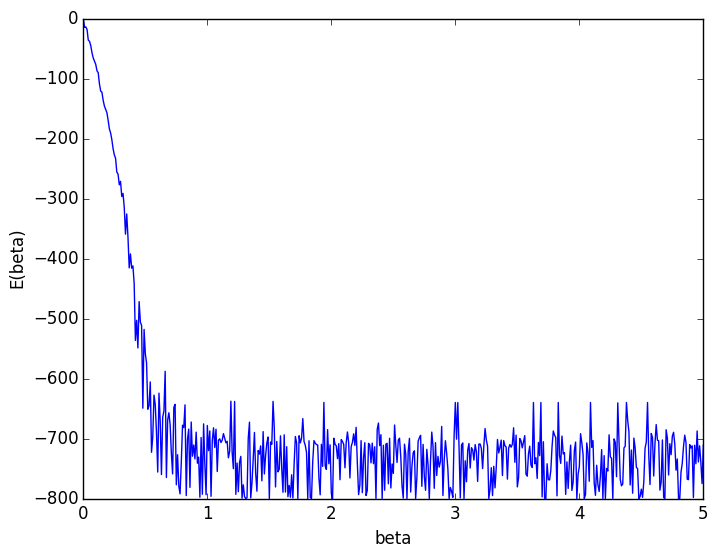

PyObject <matplotlib.text.Text object at 0x30fdc8f10>

In [44]:
db=0.01
l=int(floor(5/db)+1)
B=zeros(l)
E=zeros(l)
T=zeros(l)
T[1]=10000
E[1]=Ising(20,T[1],10000,20000)[1]
for j=2:l
    B[j]=(j-1)*db
    T[j]=1/B[j]
    E[j]=Ising(20,T[j],10000,20000)[1]
end
 
plot(B,E)
xlabel( "beta" )
ylabel("E(beta)")

[7] Haz lo mismo con la magnetización. ¿Por qué no da un resultado interesante? ¿Qué podrías hacer al respecto? Impleméntalo y dibuja las gráficas.

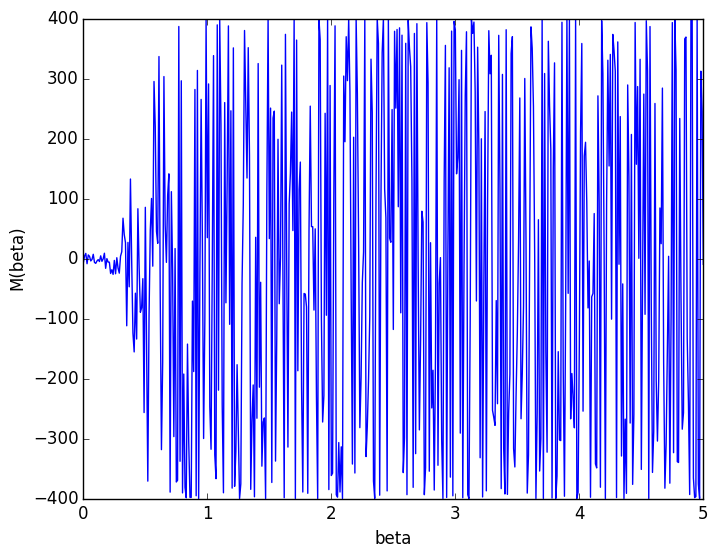

PyObject <matplotlib.text.Text object at 0x30c9e6790>

In [45]:
db=0.01
l=int(floor(5/db)+1)
B=zeros(l)
M=zeros(l)
T=zeros(l)
T[1]=10000
M[1]=Ising(20,T[1],10000,20000)[4]
for j=2:l
    B[j]=(j-1)*db
    T[j]=1/B[j]
    M[j]=Ising(20,T[j],10000,20000)[4]
end
plot(B,M)
xlabel("beta")
ylabel("M(beta)")

No da un resultado interesante porque la magnetización no tiende a un valor fijo para temperaturas bajas a diferencia de la energía

[8] Cambia gradualmente la temperatura inversa de $5$ a $0$ y haz una animación de algunas **configuraciones** representativas para distintas temperaturas.

In [46]:
using Interact

Interact.Slider{Int64}([Reactive.Input{Int64}] 5,"b",5,1:10)

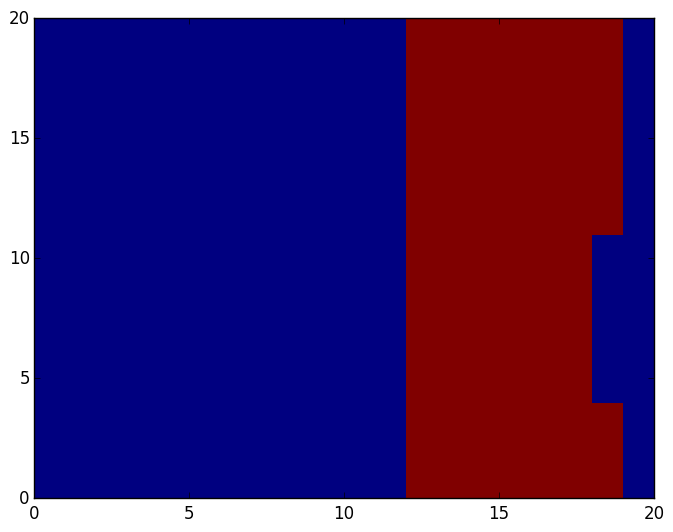

In [47]:
step=5/10
fig=figure(figsize=(8,6))
@manipulate for b=1:10
    withfig(fig) do
        pcolormesh(Ising(20,1/((b)*step),10000,20000)[5])
    end
end

Interact.Slider{Int64}([Reactive.Input{Int64}] 5,"i",5,1:10)

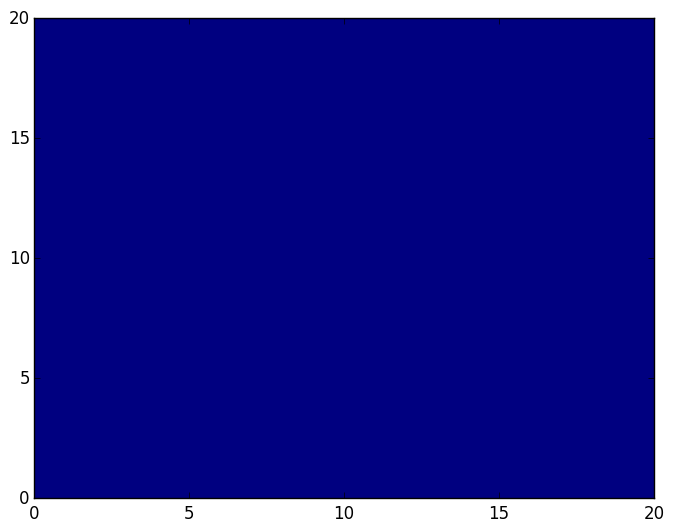

In [48]:
step=5/10
fig=figure(figsize=(8,6))
@manipulate for i=1:10
    T=1/(step*i)
    withfig(fig) do
        pcolormesh(Ising(20,T,10000,30000)[5])
    end
end

[9] Interpreta todo esto físicamente. ¿Qué estamos viendo?

Vemos que conforme la temperatura inversa aumenta (i.e. la temperatura disminuye), se alinean los espines y vemos más áreas del mismo "color".